In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)
# Set random seed for reproducible results
tf.random.set_seed(22)

2.15.0


In [5]:
import keras
from keras import layers

## Exercise 1: Repeat the MLP with Tensorflow Core APIs example using [Keras](https://www.tensorflow.org/guide/keras/sequential_model).

### Load and preprocess the data

This tutorial uses the [MNIST dataset](http://yann.lecun.com/exdb/mnist), and demonstrates how to build an MLP model that can classify handwritten digits. The dataset is available from [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/mnist).

Split the MNIST dataset into training, validation, and testing sets. The validation set can be used to gauge the model's generalizability during training so that the test set can serve as a final unbiased estimator for the model's performance.

Rescale the data so that the pixel values of [0,255] fit into the range of [0,1]. This step ensures that the input pixels have similar distributions and helps with training convergence.

In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


### Step 1: Initialize a [Keras Sequential MLP model](https://www.tensorflow.org/tutorials/quickstart/beginner) with the following architecture:

Input shape: `input_shape=(28, 28)`

Forward Pass: ReLU(784 x 700) x ReLU(700 x 500) x Softmax(500 x 10)

The softmax activation function does not need to be applied by the MLP. It is computed separately in the loss and prediction functions.

In [17]:
hidden_layer_1_size = 700
hidden_layer_2_size = 500
output_size = 10

keras_mlp_model = keras.Sequential(
    [
      layers.Flatten(input_shape=(28, 28)),
      layers.Dense(units=hidden_layer_1_size, activation="relu"),
      layers.Dense(units=hidden_layer_2_size, activation="relu"),
      layers.Dense(units=output_size)
    ]
)

keras_mlp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 700)               549500    
                                                                 
 dense_10 (Dense)            (None, 500)               350500    
                                                                 
 dense_11 (Dense)            (None, 10)                5010      
                                                                 
Total params: 905010 (3.45 MB)
Trainable params: 905010 (3.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile the model:

Set:

`optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),`

`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),`

`metrics=['accuracy']`

In [18]:
keras_mlp_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

### Step 3: Train the model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

Set:

`epochs=10` and

`validation_split=0.20`

In [23]:
%%time
history = keras_mlp_model.fit(x_train, y_train,
                              epochs=10,
                              validation_split=0.20)

Epoch 1/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0943 - val_accuracy: 0.9837
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.0696 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0996 - val_accuracy: 0.9830
Epoch 4/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.0833 - val_accuracy: 0.9851
Epoch 5/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0645 - val_accuracy: 0.9898
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0997 - val_accuracy: 0.9860
Epoch 7/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0129 - accuracy: 0.9972 - val_loss: 0.1107 -

### Step 4: Performance evaluation

Visualize the model's training progress using the stats stored in the `history` object.

Use the plotting function to visualize the model's `loss` and `accuracy` during training.

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.011164,0.997333,0.099650,0.986000,5
6,0.012861,0.997167,0.110679,0.983917,6
7,0.013000,0.996583,0.129798,0.983500,7
8,0.007256,0.998292,0.101466,0.987083,8
9,0.012708,0.997104,0.101491,0.985250,9


In [27]:
def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
  plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
  plt.xlabel("Epochs")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} vs Training epochs");

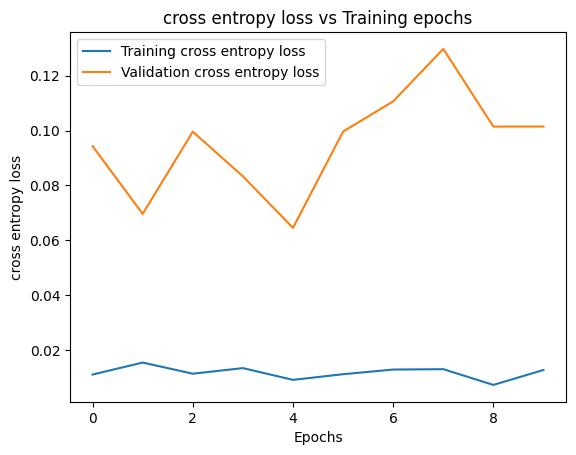

In [28]:
plot_metrics(hist['loss'], hist['val_loss'], "cross entropy loss")

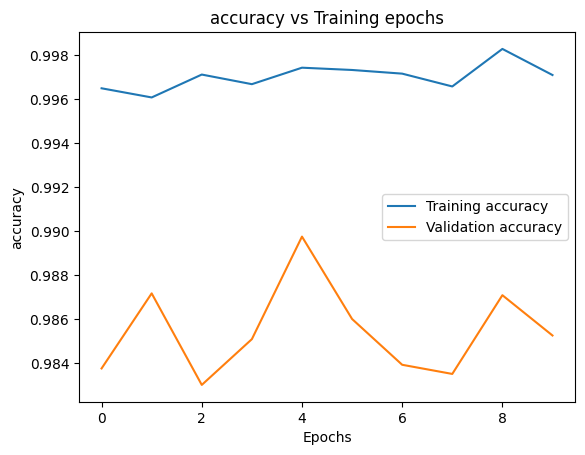

In [29]:
plot_metrics(hist['accuracy'], hist['val_accuracy'], "accuracy")

In [30]:
keras_mlp_model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - loss: 0.1660 - accuracy: 0.9818 - 3s/epoch - 8ms/step


[0.16596178710460663, 0.9818000197410583]

## Exercise 2: [Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification) using Sebastian Raschka's implementation of [NeuralNetMLP](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch12/neuralnet.py) in [Chapter 12 of Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch12/ch12.ipynb)

### Import the Fashion MNIST dataset

This exercise uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

In [62]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [63]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [64]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

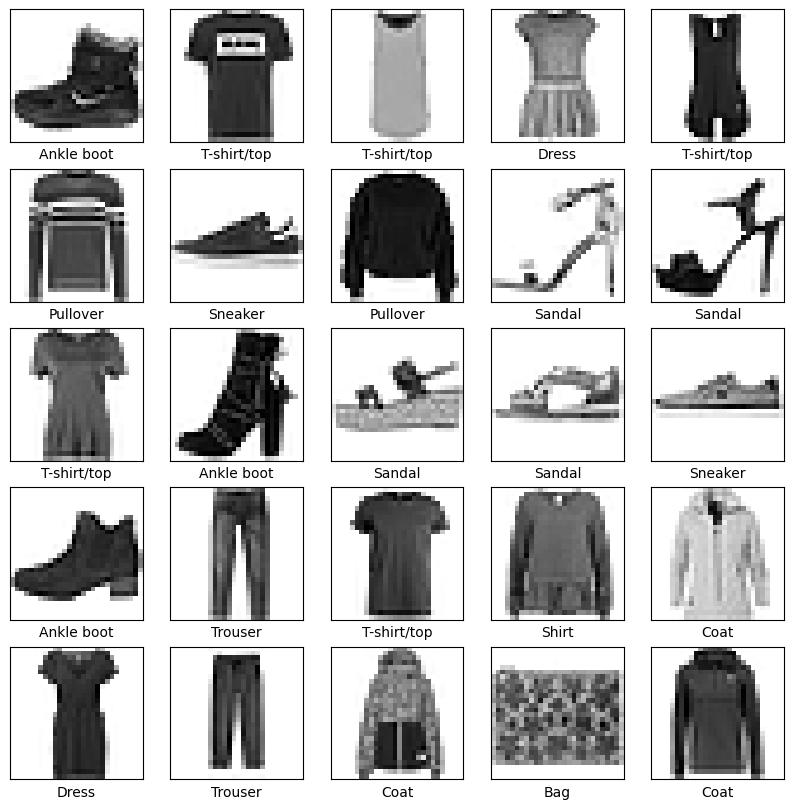

In [65]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [66]:
train_images = tf.reshape(train_images, [-1, 784]).numpy()

test_images = tf.reshape(test_images, [-1, 784]).numpy()

### Step 1: Add Sebastian Raschka's implementation of [NeuralNetMLP](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch12/neuralnet.py) in Chapter 12 of Python Machine Learning in the next code cell:

**In these two lines:**

`train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[0])`

`valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) / X_valid.shape[0])`

**Replace `np.float` with `float`**, as in:

`train_acc = ((np.sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])`

`valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])`

In [67]:
import sys
import numpy as np

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        n_classes : int
            Number of classes

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)

        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)

            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

### Step 2: Initialize a new [784-100-10 MLP](https://learning.oreilly.com/library/view/python-machine-learning/9781789955750/Text/Chapter_12.xhtml#_idParaDest-228) — an NN with 784 input units (`n_features`), 100 hidden units (`n_hidden`), and 10 output units (`n_output`):

Set:

`n_hidden=100,`

`l2=0.01,`

`epochs=n_epochs,`

`eta=0.001,`

`minibatch_size=512,`

`shuffle=True,`

`seed=1`

In [55]:
n_epochs = 50

nn_mlp_model = NeuralNetMLP(n_hidden=100,
                            l2=0.01,
                            epochs=n_epochs,
                            eta=0.001,
                            minibatch_size=512,
                            shuffle=True,
                            seed=1)
nn_mlp_model

In [56]:
nn_mlp_model.fit(X_train=train_images[:45000],
                 y_train=train_labels[:45000],
                 X_valid=train_images[45000:],
                 y_valid=train_labels[45000:])

50/50 | Cost: 25184.66 | Train/Valid Acc.: 89.40%/87.57% 

### Step 3: Performance evaluation

Visualize the model's training progress using the stats stored in the `model.eval_` object.

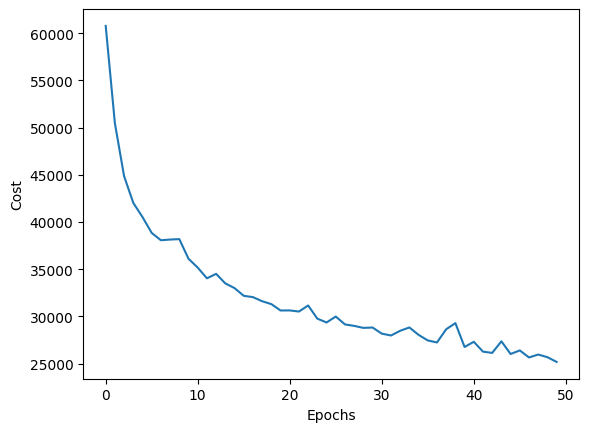

In [68]:
plt.plot(range(nn_mlp_model.epochs), nn_mlp_model.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

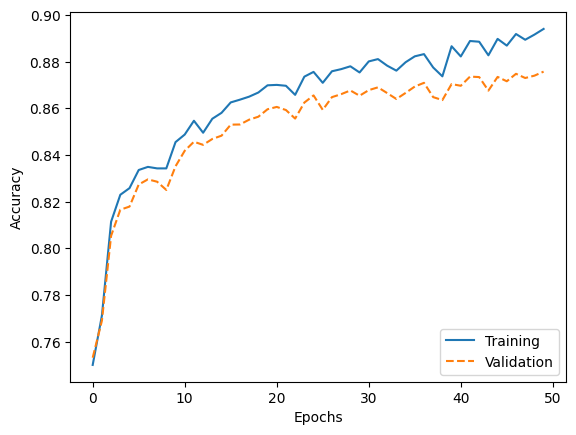

In [59]:
plt.plot(range(nn_mlp_model.epochs), nn_mlp_model.eval_['train_acc'],
         label='Training')
plt.plot(range(nn_mlp_model.epochs), nn_mlp_model.eval_['valid_acc'],
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()